# Tutorial: K-Nearest Neighbors (K-NN)

# New Section

In this tutorial, you will be building a simple classifier using K-NN model that will attempt to classify whether a person  will purchase our product when targeted by social network advertisements

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [ ]:
df.shape

(400, 3)

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
X = df[["Age","EstimatedSalary"]]
y = df["Purchased"]

# Visualising the dataset

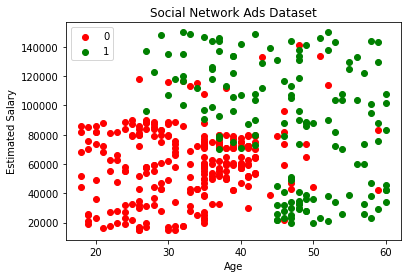

In [ ]:
plt.scatter(X[y == 0]["Age"], X[y == 0]["EstimatedSalary"], c = 'red', label = 0)
plt.scatter(X[y == 1]["Age"], X[y == 1]["EstimatedSalary"], c = 'green', label = 1)
plt.title('Social Network Ads Dataset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Plotting the Confusion Matrix

accuracy:  0.93


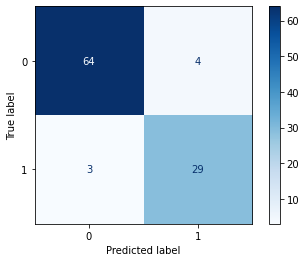

In [ ]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
cm = plot_confusion_matrix(classifier,X_test, y_test,cmap="Blues");
print("accuracy: ",accuracy_score(y_test, y_pred))

## Visualising the Training set/Test set results

Below are some codes to visualize the training and test set results. **This takes a long time to run**

### Training Set result

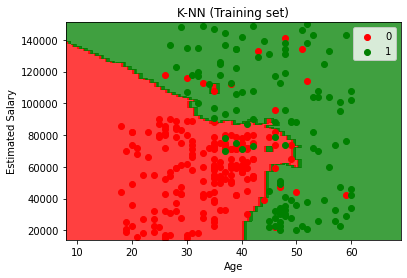

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
colors=['red','green']
for i in y_set.unique():
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = colors[i], label = i)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test set result

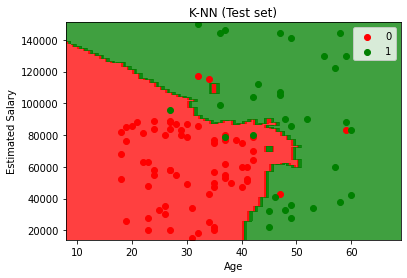

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i in y_set.unique():
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = colors[i], label = i)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()